In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

# KMeans Example

In [5]:
data = loadmat('data/ex7data2.mat')
data.keys()

['X', '__version__', '__header__', '__globals__']

In [7]:
data['X'].shape

(300, 2)

In [8]:
km = KMeans(3)
km.fit(data['X'])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
km.labels_

array([2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], d

In [18]:
km.cluster_centers_

array([[6.03366736, 3.00052511],
       [3.04367119, 1.01541041],
       [1.95399466, 5.02557006]])

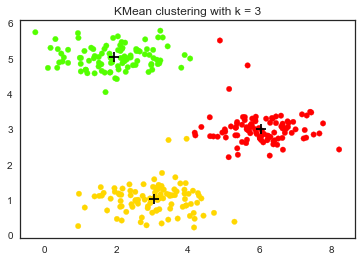

In [21]:
plt.scatter(data['X'][:,0],data['X'][:,1], c=km.labels_, s=30, cmap=plt.cm.prism)
plt.title('KMean clustering with k = 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c='k',marker='+', s=90)

# Image compression using KMean

In [23]:
img = plt.imread('data/bird_small.png')
img.shape

(128, 128, 3)

In [32]:
img[0][0]

array([0.85882354, 0.7058824 , 0.40392157], dtype=float32)

In [34]:
A = img/255
A.shape

(128, 128, 3)

In [35]:
A[0][0]

array([0.00336794, 0.00276817, 0.00158401], dtype=float32)

In [36]:
AA = A.reshape(128*128,3)
AA

array([[0.00336794, 0.00276817, 0.00158401],
       [0.0035371 , 0.00284506, 0.00178393],
       [0.00347559, 0.00286044, 0.00169166],
       ...,
       [0.00099962, 0.00066128, 0.00059977],
       [0.00089196, 0.00056901, 0.00058439],
       [0.00079969, 0.00059977, 0.00052288]], dtype=float32)

In [37]:
km = KMeans(16)
km.fit(AA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
km.labels_

array([ 0,  0,  0, ..., 14, 14, 14], dtype=int32)

In [56]:
km.cluster_centers_

array([[0.00341004, 0.00281611, 0.0017911 ],
       [0.00112948, 0.00102168, 0.00101321],
       [0.00377923, 0.00337074, 0.00247802],
       [0.0018014 , 0.00152194, 0.00138804],
       [0.00033265, 0.00036028, 0.00032023],
       [0.00360104, 0.00224271, 0.00099072],
       [0.00297665, 0.0023857 , 0.00134512],
       [0.00222564, 0.00281973, 0.0034051 ],
       [0.00181716, 0.00130266, 0.00070994],
       [0.00151353, 0.00178841, 0.00252557],
       [0.00255632, 0.0018569 , 0.00083285],
       [0.00274963, 0.00246973, 0.00220619],
       [0.00230524, 0.00196447, 0.00175769],
       [0.00383124, 0.00371032, 0.00320723],
       [0.00064954, 0.00065352, 0.00062148],
       [0.00324572, 0.00292713, 0.00289161]], dtype=float32)

In [57]:
km.cluster_centers_[km.labels_].shape

(16384, 3)

In [64]:
km.cluster_centers_[km.labels_]

array([[0.00341004, 0.00281611, 0.0017911 ],
       [0.00341004, 0.00281611, 0.0017911 ],
       [0.00341004, 0.00281611, 0.0017911 ],
       ...,
       [0.00064954, 0.00065352, 0.00062148],
       [0.00064954, 0.00065352, 0.00062148],
       [0.00064954, 0.00065352, 0.00062148]], dtype=float32)

In [58]:
cmp_img = km.cluster_centers_[km.labels_].reshape(128,128,3)

In [60]:
cmp_img = cmp_img * 255
cmp_img

array([[[0.86956054, 0.7181091 , 0.45673013],
        [0.86956054, 0.7181091 , 0.45673013],
        [0.86956054, 0.7181091 , 0.45673013],
        ...,
        [0.08482466, 0.09187207, 0.08165982],
        [0.08482466, 0.09187207, 0.08165982],
        [0.08482466, 0.09187207, 0.08165982]],

       [[0.86956054, 0.7181091 , 0.45673013],
        [0.86956054, 0.7181091 , 0.45673013],
        [0.86956054, 0.7181091 , 0.45673013],
        ...,
        [0.08482466, 0.09187207, 0.08165982],
        [0.08482466, 0.09187207, 0.08165982],
        [0.08482466, 0.09187207, 0.08165982]],

       [[0.86956054, 0.7181091 , 0.45673013],
        [0.86956054, 0.7181091 , 0.45673013],
        [0.86956054, 0.7181091 , 0.45673013],
        ...,
        [0.08482466, 0.09187207, 0.08165982],
        [0.08482466, 0.09187207, 0.08165982],
        [0.08482466, 0.09187207, 0.08165982]],

       ...,

       [[0.08482466, 0.09187207, 0.08165982],
        [0.08482466, 0.09187207, 0.08165982],
        [0.08482466, 0

In [69]:
cmp_img.shape

(128, 128, 3)

Text(0.5,1,'Compressed Image')

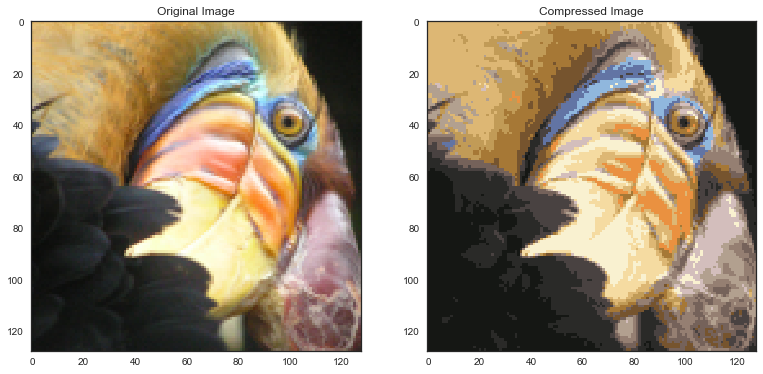

In [67]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(13,9))
ax1.imshow(img)
ax1.set_title('Original Image')
ax2.imshow(cmp_img)
ax2.set_title('Compressed Image')